<a href="https://colab.research.google.com/github/Pavithra2904/PRODIGY_T2_DS/blob/main/task_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


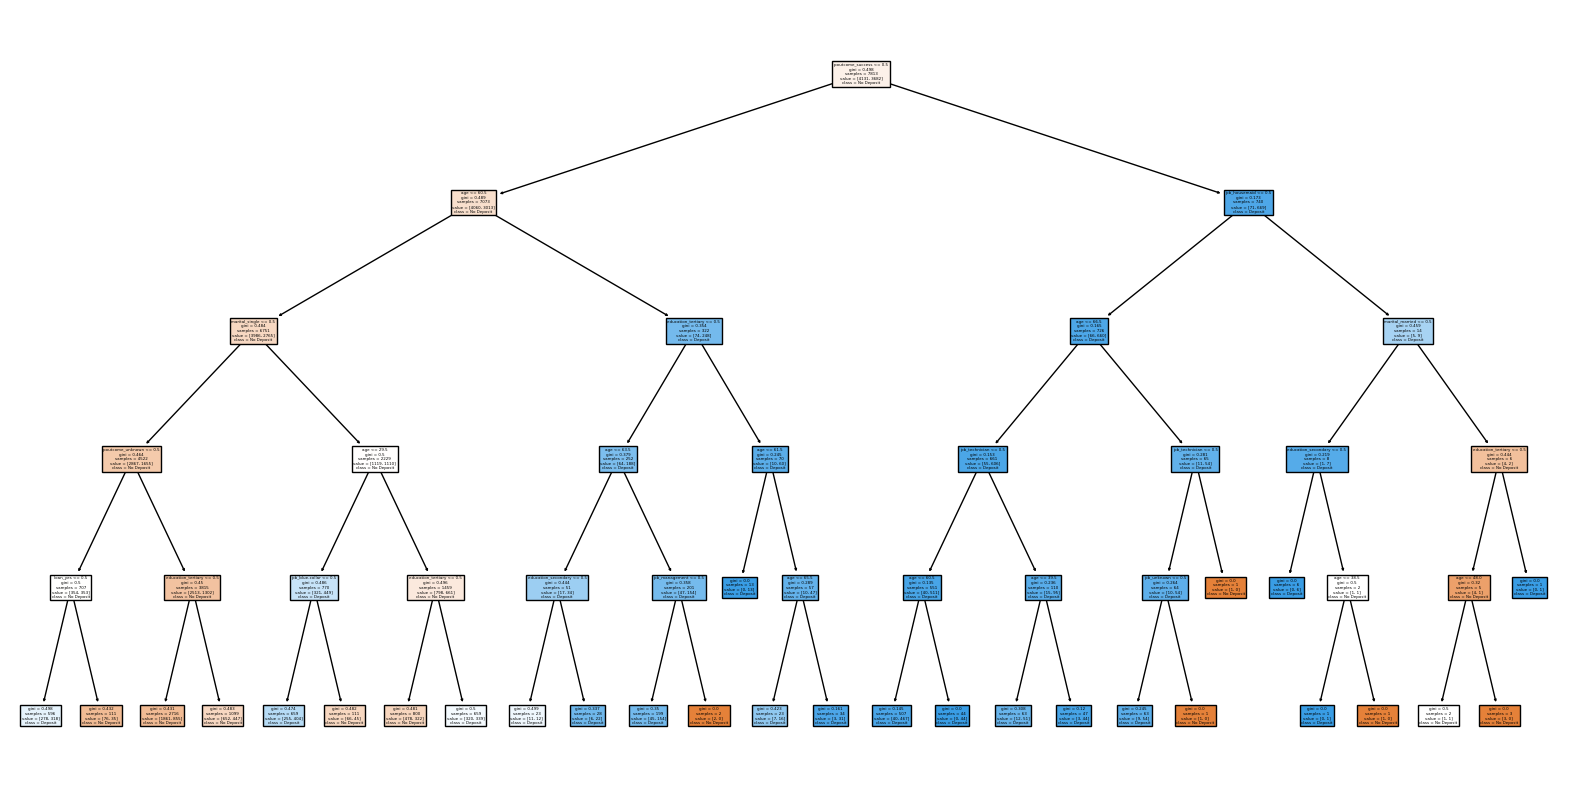

Accuracy: 0.6536279486413855

Classification Report:
              precision    recall  f1-score   support

          no       0.64      0.77      0.70      1742
         yes       0.68      0.53      0.59      1607

    accuracy                           0.65      3349
   macro avg       0.66      0.65      0.65      3349
weighted avg       0.66      0.65      0.65      3349


Confusion Matrix:
[[1344  398]
 [ 762  845]]


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
retail_df = pd.read_csv('/content/task_03_ds.csv')

# Display the first few rows of the dataset
print(retail_df.head())

# Create the target variable based on Total Amount
#retail_df['Purchase'] = retail_df['Total Amount'] > 0

# Prepare the features and target variable
X = retail_df[['job', 'age', 'marital', 'loan', 'education', 'poutcome']]
y = retail_df['deposit']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
max_depth = 5
dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)
# Plot decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No Deposit', 'Deposit'])
plt.show()

# Predict the response for test dataset
y_pred = dt_classifier.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

